In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from model_functions import *
from plotting_functions import *
import no_gpu
import reproducible

In [4]:
import time

In [5]:
X_train, X_val, y_train, y_val = mnist_prep()

In [6]:
# use samller dataset for increased speed
X_train_small = X_train[:1000, :]
X_val_small = X_val[:500, :]
y_train_small = y_train[:1000]
y_val_small = y_val[:500]

n_cols = X_train_small.shape[1]

In [7]:
layers = 5
neurons = [128, 128, 64, 32, 10]
n_cols = X_train_small.shape[1]
batch_size = 100
epochs = 10

Epoch 1/10
10/10 [==============================] - 0s 17ms/step - loss: 2.0682 - accuracy: 0.3570 - val_loss: 1.8012 - val_accuracy: 0.5560
Epoch 2/10
10/10 [==============================] - 0s 11ms/step - loss: 1.2685 - accuracy: 0.7170 - val_loss: 1.2019 - val_accuracy: 0.6620
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6592 - accuracy: 0.8350 - val_loss: 0.8035 - val_accuracy: 0.7520
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.3442 - accuracy: 0.9170 - val_loss: 0.6226 - val_accuracy: 0.8020
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1959 - accuracy: 0.9540 - val_loss: 0.5279 - val_accuracy: 0.8280
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.1208 - accuracy: 0.9700 - val_loss: 0.5188 - val_accuracy: 0.8460
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0697 - accuracy: 0.9850 - val_loss: 0.4785 - val_accuracy: 0.8500
Epoch 8/10
10/10 [

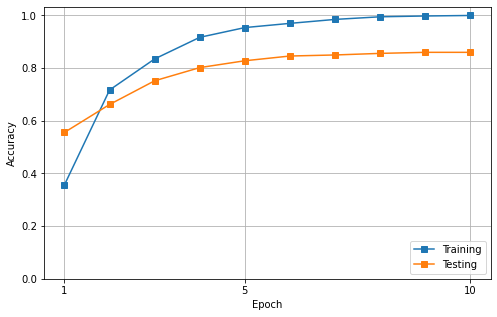

In [8]:
model = nn_model_structure(layers = layers,
                           neurons = neurons,
                           n_cols = n_cols)
model = nn_model_compile(model,
                         optimizer = "adam")
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train_small,
                     y_train = y_train_small,
                     X_val = X_val_small,
                     y_val = y_val_small,
                     batch_size = batch_size,
                     epochs = epochs)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_acc(model,
            mean_comparison = False)

In [9]:
model.history.history

{'loss': [2.0681631565093994,
  1.2685341835021973,
  0.6592463850975037,
  0.34417566657066345,
  0.19594396650791168,
  0.12075728923082352,
  0.06968281418085098,
  0.041364505887031555,
  0.026097582653164864,
  0.015438340604305267],
 'accuracy': [0.3569999933242798,
  0.7170000076293945,
  0.8349999785423279,
  0.9169999957084656,
  0.9539999961853027,
  0.9700000286102295,
  0.9850000143051147,
  0.9950000047683716,
  0.9980000257492065,
  1.0],
 'val_loss': [1.8011852502822876,
  1.2019312381744385,
  0.8035430312156677,
  0.6225842237472534,
  0.5278695225715637,
  0.5188038945198059,
  0.47851794958114624,
  0.49224650859832764,
  0.49270910024642944,
  0.48919394612312317],
 'val_accuracy': [0.5559999942779541,
  0.6620000004768372,
  0.7519999742507935,
  0.8019999861717224,
  0.828000009059906,
  0.8460000157356262,
  0.8500000238418579,
  0.8560000061988831,
  0.8600000143051147,
  0.8600000143051147]}

In [10]:
y_true, y_pred = nn_class_pred_true(model, X_val_small, y_val_small, print_comp = True)

Prediction: 7, Actual: 7, True
Prediction: 2, Actual: 2, True
Prediction: 1, Actual: 1, True
Prediction: 0, Actual: 0, True
Prediction: 4, Actual: 4, True
Prediction: 1, Actual: 1, True
Prediction: 4, Actual: 4, True
Prediction: 9, Actual: 9, True
Prediction: 4, Actual: 5, False
Prediction: 9, Actual: 9, True
Prediction: 0, Actual: 0, True
Prediction: 2, Actual: 6, False
Prediction: 9, Actual: 9, True
Prediction: 0, Actual: 0, True
Prediction: 1, Actual: 1, True
Prediction: 5, Actual: 5, True
Prediction: 9, Actual: 9, True
Prediction: 7, Actual: 7, True
Prediction: 3, Actual: 3, True
Prediction: 4, Actual: 4, True
Prediction: 9, Actual: 9, True
Prediction: 6, Actual: 6, True
Prediction: 4, Actual: 6, False
Prediction: 5, Actual: 5, True
Prediction: 4, Actual: 4, True
Prediction: 0, Actual: 0, True
Prediction: 7, Actual: 7, True
Prediction: 4, Actual: 4, True
Prediction: 0, Actual: 0, True
Prediction: 1, Actual: 1, True
Prediction: 3, Actual: 3, True
Prediction: 1, Actual: 1, True
Predi

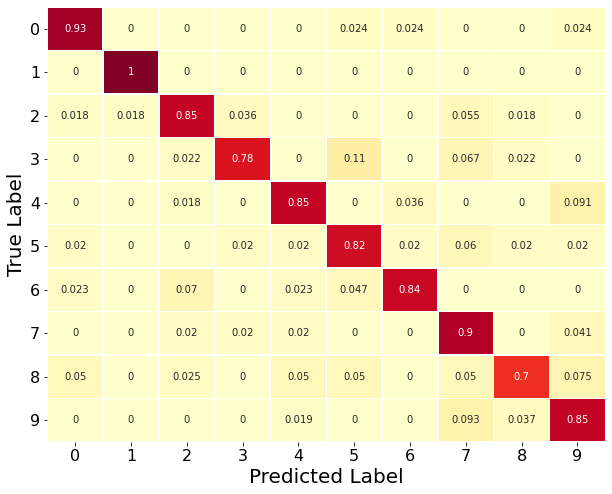

In [11]:
cm = nn_conf_mat(y_true, y_pred)